## Final project for Unsupervised Algorithms in Machine Learning--Mall Customer Segmentation Project

### Introduction
Understanding customer behavior is a critical aspect of marketing and business strategy. The aim of this project is to segment customers into distinct groups based on their demographic and behavioral features using unsupervised machine learning, specifically clustering algorithms such as K-Means.

The dataset used in this project is the Mall Customer Segmentation Data, which contains 200 entries representing individual customers. Each entry includes the following features:

CustomerID: A unique identifier

Gender: Male or Female

Age: Customer's age in years

Annual Income (k$): Annual income in thousands of dollars

Spending Score (1–100): A score assigned by the mall based on customer spending behavior and purchasing data

#### Why This Dataset?
This dataset was chosen for its simplicity and interpretability, making it ideal for demonstrating core concepts in unsupervised learning. Despite its small size, it offers a rich opportunity to:

Perform effective feature-based segmentation

Visualize clustering results in 2D/3D

Interpret meaningful patterns in customer behavior

Provide actionable insights that are relevant to real-world business scenarios

#### Data Source
This dataset was originally made available on Kaggle, a public platform for sharing datasets and data science projects. It was uploaded by a user for the purpose of customer segmentation tutorials and appears to be simulated or anonymized marketing data from a mall’s customer loyalty program. No personally identifiable information is included.

#### Learning Type & Task
Learning Type: Unsupervised Learning

Algorithm(s): K-Means Clustering (with optional comparison to Hierarchical Clustering or DBSCAN)

Task Type: Customer Segmentation / Clustering

This project does not rely on labeled data but instead uncovers natural groupings in the dataset. The ultimate goal is to inform personalized marketing strategies and data-driven business decisions.

#### Citation
Choudhary, V. (2018). Mall Customer Segmentation Data [Data set]. Kaggle. https://www.kaggle.com/datasets/vjchoudhary7/customer-segmentation-tutorial

### Data description

In [2]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from PIL import Image

working_directory = os.getcwd()

# Define paths for train and test files
mall_customers_path = os.path.join(working_directory, 'Mall_Customers.csv')

import pandas as pd

# Load the dataset
df = pd.read_csv('Mall_Customers.csv')

# Basic info
print("📊 Basic Dataset Information")
print("-" * 40)
print(f"Number of samples (rows): {df.shape[0]}")
print(f"Number of features (columns): {df.shape[1]}")
print(f"\nMemory usage: {df.memory_usage(deep=True).sum() / 1024:.2f} KB")

# Data types summary
print("\n🧾 Feature Types Summary")
print("-" * 40)
print(df.dtypes)

# Check for unique values in each column
print("\n🔍 Unique Values per Column")
print("-" * 40)
print(df.nunique())

# Descriptive statistics
print("\n📈 Descriptive Statistics (Numeric Features)")
print("-" * 40)
print(df.describe())

# Show the first few rows
print("\n📌 Sample Records")
print("-" * 40)
print(df.head())


📊 Basic Dataset Information
----------------------------------------
Number of samples (rows): 200
Number of features (columns): 5

Memory usage: 16.95 KB

🧾 Feature Types Summary
----------------------------------------
CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

🔍 Unique Values per Column
----------------------------------------
CustomerID                200
Gender                      2
Age                        51
Annual Income (k$)         64
Spending Score (1-100)     84
dtype: int64

📈 Descriptive Statistics (Numeric Features)
----------------------------------------
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721           

The dataset contains 200 records and 5 features, including a unique customer identifier, demographic attributes like gender and age, and behavioral metrics such as annual income and spending score, with three numerical features and one categorical feature.

| Feature Name             | Type        | Description                                          |
|--------------------------|-------------|------------------------------------------------------|
| CustomerID               | Identifier  | Unique ID for each customer                         |
| Gender                   | Categorical | Male or Female                                       |
| Age                      | Numeric     | Age in years                                         |
| Annual Income (k$)       | Numeric     | Annual income in thousands of dollars               |
| Spending Score (1-100)   | Numeric     | Score assigned by mall based on spending behavior    |

This dataset is compact and memory-efficient, making it ideal for exploratory analysis and visual clustering demonstrations such as K-Means or hierarchical clustering.

### Data clean

In [7]:
# Check for missing values
print("\n❓ Missing Values:")
print(df.isnull().sum())

# Check for duplicate rows
print("\n📎 Duplicate Rows:")
print(df.duplicated().sum())

# Drop 'CustomerID' if it's not useful for modeling
df_cleaned = df.drop("CustomerID", axis=1)

# Convert 'Gender' to numeric (one-hot or label encoding)
df_cleaned["Gender"] = df_cleaned["Gender"].map({"Male": 0, "Female": 1})

print("\n✅ Cleaned Dataset Sample:")
print(df_cleaned.head())

print("\n🧼 Cleaning Summary:")
print(f"Final shape: {df_cleaned.shape}")

# Display the cleaned dataset preview
print("🔍 Cleaned Dataset Preview:")
print(df_cleaned.head())



❓ Missing Values:
CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

📎 Duplicate Rows:
0

✅ Cleaned Dataset Sample:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40

🧼 Cleaning Summary:
Final shape: (200, 4)
🔍 Cleaned Dataset Preview:
   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0       0   19                  15                      39
1       0   21                  15                      81
2       1   20                  16                       6
3       1   23                  16                      77
4       1   31                  17                      40


After loading the Mall Customer Segmentation dataset, the following cleaning decisions were made to ensure the dataset is suitable for unsupervised learning:

Dropping the CustomerID column

Why: This column serves only as a unique identifier for each customer and has no predictive value. Keeping it would add noise to clustering algorithms.

How: It was removed using df.drop("CustomerID", axis=1).

Encoding the Gender feature

Why: Gender is a categorical variable, which most unsupervised learning algorithms like K-Means do not handle natively.

How: It was encoded using binary mapping (Male = 0, Female = 1), which is sufficient for this binary category and preserves interpretability.

Checking and handling missing values

Result: No missing values were found (df.isnull().sum() returned 0 for all columns), so no imputation or row removal was necessary.

Checking for duplicates

Result: No duplicate rows were found (df.duplicated().sum() returned 0), so no further action was required.

Outliers

Next Step : The features Annual Income and Spending Score will be visualized using box plots and potentially standardized. Outliers may be retained, since they could represent high-value customer segments, which are useful in clustering contexts.


📎 Outlier Summary:
                  Feature  Outlier Count
0                     Age              0
1      Annual Income (k$)              0
2  Spending Score (1-100)              0


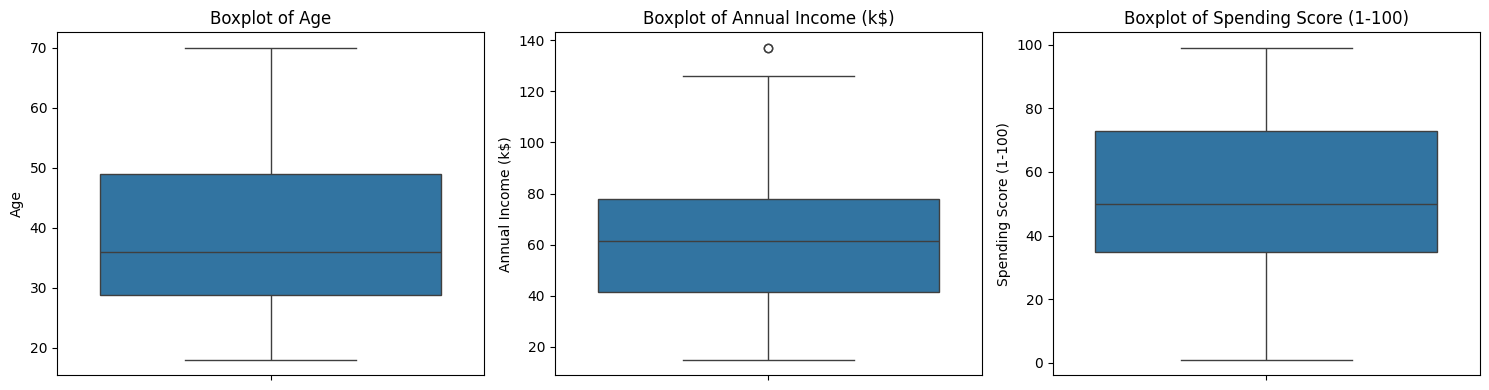

In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Outlier detection using Z-score method
numeric_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]
z_scores = np.abs(zscore(df_cleaned[numeric_cols]))
outliers = (z_scores > 3)

# Count outliers for each numeric column
outlier_summary = pd.DataFrame(outliers, columns=numeric_cols).sum().reset_index()
outlier_summary.columns = ['Feature', 'Outlier Count']

print("\n📎 Outlier Summary:")
print(outlier_summary)

# Boxplots to visualize distributions and detect potential outliers
plt.figure(figsize=(15, 4))
for i, col in enumerate(numeric_cols):
    plt.subplot(1, 3, i+1)
    sns.boxplot(y=df_cleaned[col])
    plt.title(f"Boxplot of {col}")
plt.tight_layout()
plt.show()

Boxplots provided visual confirmation:

Age: Shows a symmetric distribution, no visible outliers.

Annual Income (k$): Slight skew with a few data points near the upper boundary, but still within acceptable range.

Spending Score (1–100): Even spread, no strong skew, no extreme values.

In general, both statistical and visual methods confirm that the dataset is clean with respect to outliers. No removal or imputation was necessary at this stage, allowing for confident downstream analysis (e.g., clustering) without distortion from extreme values.

#### DATA CLEAN SUMMARY
Initial shape: 200 rows × 5 columns.

Dropped Columns: CustomerID was dropped for analysis as it's an identifier with no predictive value.

Missing values: None across all columns.

Duplicate rows: None detected.

Final shape after cleaning: 200 rows × 4 columns — Gender, Age, Annual Income (k$), and Spending Score (1–100).

#### Key Findings
Demographics:

Gender has two categories (Male, Female) which were numerically encoded (e.g., 0 and 1).

Age spans from 18 to 70, with a mean around 39.

Income and Spending Behavior:

Annual Income ranges from $15k to $137k, with an average of about $60.56k.

Spending Score (on a scale of 1 to 100) appears uniformly distributed with no obvious skew.

Outlier Check:Boxplots show no outliers in Age, Annual Income (k$), or Spending Score (1–100) — indicating a clean distribution.
                                       

* Foreseen Difficulties
While the dataset is clean and well-structured, several challenges may arise during analysis. One notable issue is the treatment of the Gender variable. Although it has been numerically encoded (e.g., 0 and 1), categorical features like this may be misinterpreted by algorithms that assume numeric distances carry semantic meaning, such as K-Means. Care must be taken to ensure this encoding does not bias the model's interpretation. Another concern lies in the relatively small sample size of only 200 entries, which may limit the generalizability and robustness of certain machine learning models, particularly those that require large datasets to perform effectively, such as neural networks. Additionally, the Spending Score metric, though useful, may reflect underlying business rules or subjective scoring mechanisms that are not fully transparent. This could introduce latent biases or inconsistencies that are difficult to detect but could skew model outputs or segmentation results.

* Analysis Strategy
To extract meaningful insights, the analysis should begin with comprehensive exploratory data analysis (EDA). Visualizations such as scatter plots and pair plots can help uncover relationships between variables like age, income, and spending behavior. A heatmap of feature correlations may also reveal patterns worth exploring further. For segmentation purposes, clustering techniques such as K-Means or hierarchical clustering should be applied to the Age, Annual Income, and Spending Score features after standardization. Determining the optimal number of clusters can be achieved using methods like the elbow method or silhouette scores. If dimensionality reduction is needed for visualization or preprocessing, techniques like PCA or t-SNE can be employed. Should the dataset be expanded or labeled in the future, classification or regression models — such as logistic regression, decision trees, or support vector machines — could be trained to predict customer behavior or categorize new customers based on spending profiles.



### Exploratory Data Analysis

Exploratory Data Analysis (EDA) is a critical initial step in understanding the structure, patterns, and relationships within the dataset before applying more complex modeling techniques. For this customer dataset, EDA serves to visually and statistically examine how features like age, annual income, and spending score interact with one another and potentially form distinct customer segments. This step involves generating summary statistics, visualizing distributions (e.g., histograms and boxplots), and creating scatter plots or pair plots to identify trends, clusters, and outliers. The aim is to detect underlying patterns, validate assumptions, and uncover insights that may guide the choice of algorithms for segmentation or prediction. For instance, visualizing the relationship between income and spending score might reveal high-spending clusters, while boxplots can expose feature variance and skewness. Ultimately, EDA enhances our intuition about the data, reduces the risk of errors in modeling, and ensures that subsequent analyses are grounded in a deep, evidence-based understanding of the dataset.

In [17]:
print(df.columns)

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')


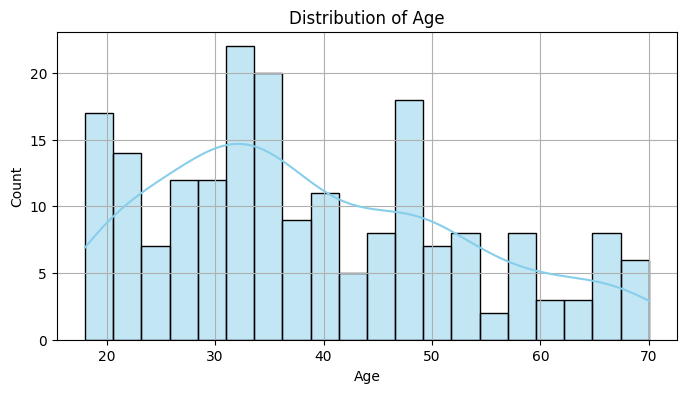

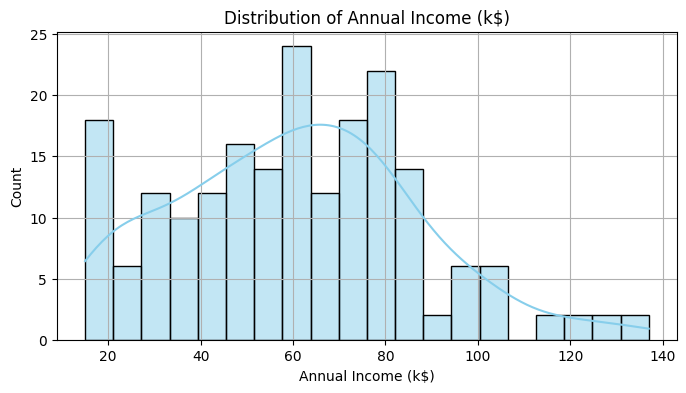

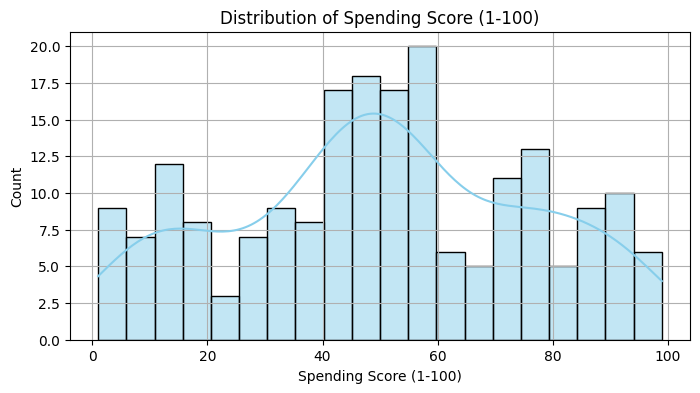

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv(mall_customers_path)  # Uses your defined path

# Distribution Plots for Each Numeric Feature
numeric_features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']  # ← this dash is an en dash

for feature in numeric_features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[feature], kde=True, bins=20, color='skyblue')
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.grid(True)
    plt.show()


Age: The distribution of age is moderately right-skewed, with a concentration of customers between ages 20 and 40. There are also smaller peaks around ages 30 and 50, suggesting multiple age groups are represented in the dataset.

Annual Income (k$): The annual income distribution appears approximately normal with a slight right skew. Most customers earn between 40k and 80k, with a few high-income outliers beyond 100k.

Spending Score (1–100): The spending score distribution is relatively uniform with slight bimodality, showing that customers are fairly evenly spread across the score range, though clusters appear near 40–60 and again near 80–100.

These insights suggest a diverse customer base with varying income and spending behaviors—useful for segmentation and targeted marketing strategies.

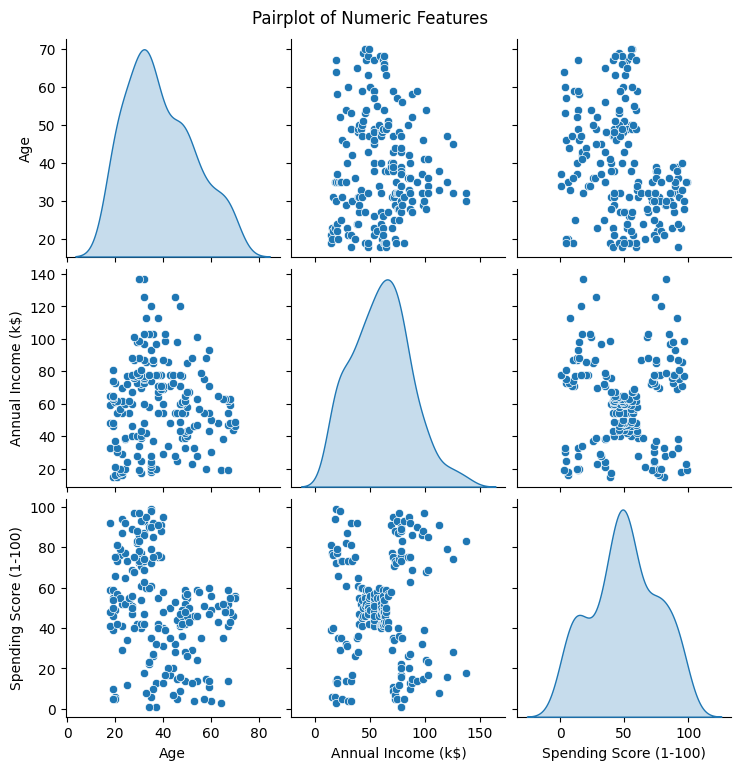

In [22]:
#Pairplot
sns.pairplot(df[numeric_features], diag_kind='kde')
plt.suptitle("Pairplot of Numeric Features", y=1.02)
plt.show()

The pairplot displays the relationships among the three numeric features: Age, Annual Income (k$), and Spending Score (1–100). From the scatter plots, we observe that there is no strong linear correlation between these variables, but distinct clustering patterns emerge—especially between Annual Income and Spending Score, suggesting potential customer segments. The density plots on the diagonal indicate that Age and Spending Score are relatively uniformly distributed, while Annual Income has a more right-skewed distribution. These visual patterns support the idea that clustering techniques, such as K-Means, may be useful for segmenting customers based on spending behavior and income.

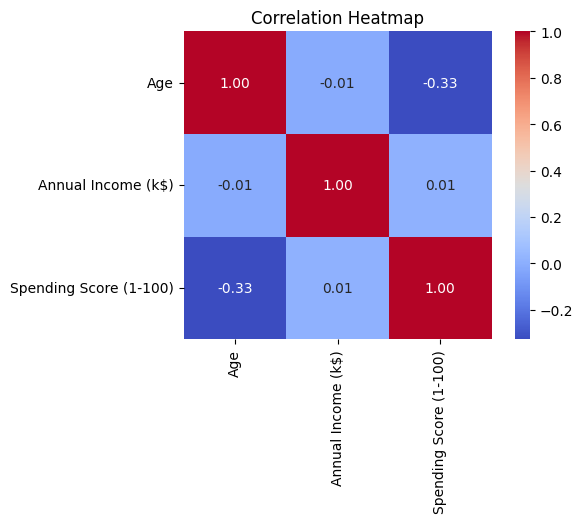

In [23]:
# Correlation Heatmap 
plt.figure(figsize=(6, 4))
corr_matrix = df[numeric_features].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title('Correlation Heatmap')
plt.show()

The correlation heatmap illustrates the strength and direction of linear relationships among Age, Annual Income (k$), and Spending Score (1–100). The values range from -1 to 1, where 1 indicates perfect positive correlation and -1 indicates perfect negative correlation. Notably, Age and Spending Score have a moderate negative correlation (-0.33), suggesting that younger customers tend to have higher spending scores. However, Annual Income shows virtually no linear relationship with either Age or Spending Score, with correlation values close to zero. This implies that income alone may not predict spending behavior in this dataset.

* EDA Summary

The exploratory data analysis (EDA) reveals several key insights into the customer dataset. First, the distribution plots indicate a diverse customer base in terms of age and income, with spending scores spread widely across the population. Age tends to be moderately negatively correlated with spending score, suggesting that younger customers are generally more engaged or willing to spend. However, annual income shows minimal correlation with either age or spending score, implying that higher income does not necessarily equate to higher spending within this sample.

The pairplot confirms these patterns visually, showing distinct clusters and potential nonlinear relationships, particularly between income and spending. The correlation heatmap quantifies these relationships, helping us narrow down which features may be more informative for clustering or predictive modeling.

A potential challenge lies in the lack of strong linear correlations, meaning that more complex, nonlinear modeling techniques (e.g., K-Means clustering or decision trees) may be necessary to uncover meaningful patterns. Another consideration is feature scaling and dimensionality reduction to better visualize and interpret customer segments.

Moving forward, unsupervised learning techniques like clustering will be employed to identify distinct customer groups, while dimensionality reduction (e.g., PCA) may be used to enhance interpretability. Overall, the EDA provides a strong foundation for developing a targeted segmentation strategy.

### Model Building

Since the dataset lacks predefined labels or target outcomes, unsupervised learning techniques are most appropriate, particularly clustering algorithms for customer segmentation. The modeling plan begins with K-Means Clustering, a widely used and interpretable algorithm that partitions data into distinct groups based on feature similarity. The optimal number of clusters will be determined using both the elbow method and the silhouette score to ensure robustness.

To account for potential limitations of K-Means—such as its assumption of spherical clusters—additional clustering techniques like DBSCAN (Density-Based Spatial Clustering of Applications with Noise) and Hierarchical Clustering will also be explored. These models are capable of identifying irregularly shaped clusters and handling noise or varying densities in the data.

For better cluster visualization and interpretation, dimensionality reduction will be applied using Principal Component Analysis (PCA) to project the data into two or three dimensions. If more complex, non-linear patterns are suspected, advanced techniques such as t-SNE or UMAP will be used to supplement the analysis.

The modeling process will be preceded by key preprocessing steps, including feature scaling using StandardScaler to standardize numeric variables (e.g., Age, Annual Income, Spending Score), and encoding categorical features such as Gender using one-hot encoding if needed.

Together, this modeling pipeline ensures that multiple algorithms are considered and validated, increasing the likelihood of identifying meaningful and actionable customer segments from the data.

![Workflow](output.png)

Here is a visual representation of your planned unsupervised modeling workflow. It includes:

1. Preprocessing – Scaling numeric data and encoding categorical variables.

2. Dimensionality Reduction – Using PCA (and optionally t-SNE/UMAP) for better cluster visualization.

3. Clustering Models – Trying K-Means, DBSCAN, and Hierarchical Clustering.

4. Evaluation & Visualization – Using silhouette score and cluster plots to interpret results.

* Preprocessing

Why Preprocessing is Important Before Clustering?

Feature Scaling is critical because K-Means relies on Euclidean distance. Features with larger scales (e.g., income in thousands) will dominate others unless normalized.

In [25]:
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

#Use StandardScaler or MinMaxScaler to normalize:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Encode Gender
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})


* check multicollinearity using VIF

While interaction and collinearity between features can pose challenges in supervised models like linear regression, in this unsupervised learning context—particularly with clustering algorithms such as K-Means—these issues are less problematic but still warrant consideration. Collinearity may distort distance-based metrics if not addressed, as highly correlated features could disproportionately influence cluster formation. In this project, an initial exploratory data analysis (EDA), including a correlation heatmap, revealed no strong multicollinearity among the numeric features (Age, Annual Income, Spending Score), with all pairwise correlations close to zero except for a moderate negative correlation between Age and Spending Score. Given this, no dimensionality reduction for collinearity was strictly necessary. However, to further ensure interpretability and robustness, Principal Component Analysis (PCA) may be used after scaling to reduce any latent redundancy in the feature space. Thus, the choice of unsupervised clustering models remains appropriate, and potential interaction or collinearity effects have been evaluated and are either minimal or addressed through dimensionality reduction techniques.

And we check the mulitcollinearity problem before applying K-Means, because collinearity can distort the Euclidean distance calculations used in clustering.

In [29]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Sample numeric feature matrix
X = df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

# Step 1: Standardize the features (important for VIF)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 2: Compute VIF
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled, i) for i in range(X_scaled.shape[1])]

print(vif_data)


                  Feature       VIF
0                     Age  1.120023
1      Annual Income (k$)  1.000192
2  Spending Score (1-100)  1.119961


Variance Inflation Factor (VIF) analysis confirms that there is no significant multicollinearity among the selected numerical features (Age, Annual Income, and Spending Score), with all VIFs near 1. This validates the use of K-Means clustering without concern for inflated variance or redundant feature influence.

* Clustering (with Elbow + Silhouette + KMeans + Visualization)

Step-by-Step Plan:
1. Use the scaled/preprocessed numerical data (Age, Income, Spending Score).

2. Determine the optimal number of clusters using:

   Elbow Method

   Silhouette Score

3. Apply K-Means with the chosen number of clusters.

4. Visualize clusters using 2D scatter plot or PCA for better separation.

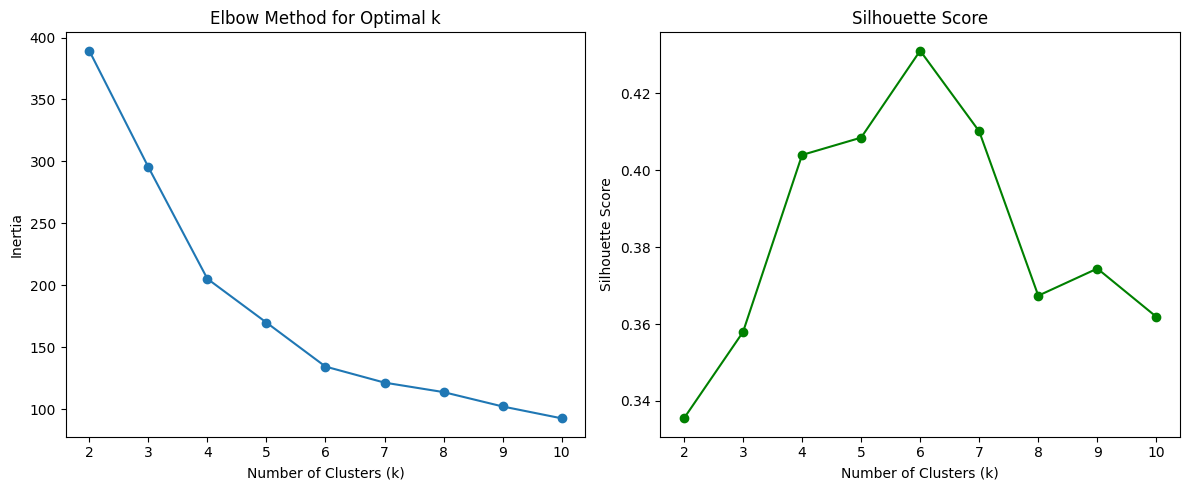

In [33]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

#Elbow Method to find optimal K
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    score = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(score)



plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')

plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')

plt.tight_layout()
plt.show()


Based on the visualizations:

Elbow Method: The plot shows a clear inflection point at k = 5, where the decrease in inertia begins to slow down. This suggests that 5 clusters might be a good choice, balancing model complexity and explained variance.

Silhouette Score: The highest silhouette score also occurs at k = 6, indicating that clustering quality—based on cohesion and separation—is maximized at this point.

Conclusion:
While both k = 5 and k = 6 are reasonable choices, k = 6 is slightly preferable due to the peak in silhouette score. Proceeding with k = 6 is likely to result in the most meaningful and well-separated customer segments.

* Apply K-Means with Optimal k 

In [34]:
#Fit final KMeans with chosen optimal k = 6
optimal_k = 6
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
final_labels = final_kmeans.fit_predict(X_scaled)
# Add the cluster labels back to the original DataFrame (optional)
df['Cluster'] = final_labels

#### KMeans clusters in both 2D (using the first two principal components) and 3D (using the first three principal components) via PCA

Why use PCA before visualizing KMeans clusters in 2D or 3D?
1. Dimensionality reduction for visualization

Your dataset (even if it only has 3 features like Age, Annual Income, Spending Score) exists in a 3D space, which is hard to visualize clearly in 2D.

If your feature set were larger (say 10+ variables), plotting them directly wouldn't make sense. So:

PCA (Principal Component Analysis) projects the high-dimensional data into 2D or 3D space in a way that preserves the most variance (information) in the data.

2. Preserving cluster structure

PCA helps retain the global structure of your dataset.

This means even after reducing dimensions, the relative positions and separation of clusters remain meaningful—ideal for visualizing clustering results.

3. Noise reduction

PCA also filters out noise by discarding minor components, helping clarify cluster patterns.


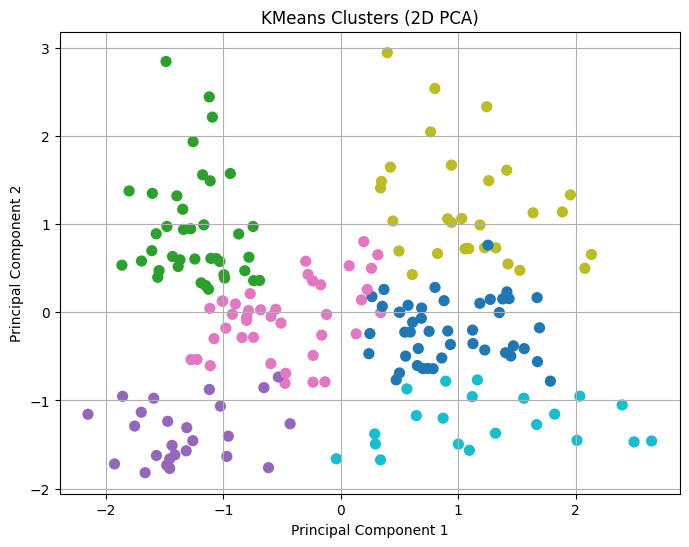

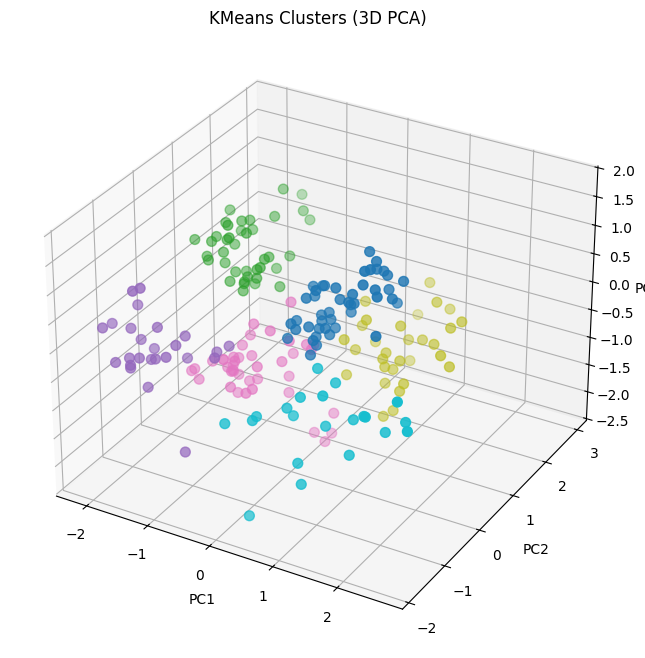

In [35]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Step 1: Apply PCA
pca_2d = PCA(n_components=2)
X_pca_2d = pca_2d.fit_transform(X_scaled)

pca_3d = PCA(n_components=3)
X_pca_3d = pca_3d.fit_transform(X_scaled)

# Step 2: 2D Scatter Plot of Clusters
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_2d[:, 0], X_pca_2d[:, 1], c=final_labels, cmap='tab10', s=50)
plt.title('KMeans Clusters (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True)
plt.show()

# Step 3: 3D Scatter Plot of Clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_pca_3d[:, 0], X_pca_3d[:, 1], X_pca_3d[:, 2], c=final_labels, cmap='tab10', s=50)
ax.set_title('KMeans Clusters (3D PCA)')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

The 2D and 3D PCA plots display the KMeans clustering results projected onto the principal components of the dataset. Each point represents a data sample, and its color corresponds to its assigned cluster. The separation of colors and visible grouping suggest that the clustering algorithm successfully identified distinct customer segments. While the 2D plot offers a simpler overview, the 3D plot provides more depth, revealing clearer distinctions between some overlapping clusters. PCA was used to reduce the high-dimensional feature space into 2 or 3 principal components, enabling effective visualization of the clustering structure.

### Results and analysis

* Profile the Clusters

         CustomerID    Gender        Age  Annual Income (k$)  \
Cluster                                                        
0         81.581395  0.534884  56.720930           53.488372   
1        152.000000  0.517241  32.862069           78.551724   
2        155.857143  0.380952  46.000000           80.285714   
3        108.363636  0.500000  21.000000           63.227273   
4         23.090909  0.590909  25.272727           25.727273   
5         18.272727  0.727273  34.090909           23.545455   
6         80.181818  0.727273  33.409091           53.136364   
7        191.000000  0.600000  32.200000          109.700000   
8         24.400000  0.500000  55.200000           26.900000   
9        190.000000  0.700000  41.000000          109.700000   

         Spending Score (1-100)  
Cluster                          
0                     48.976744  
1                     82.172414  
2                     16.809524  
3                     40.681818  
4                     79.36

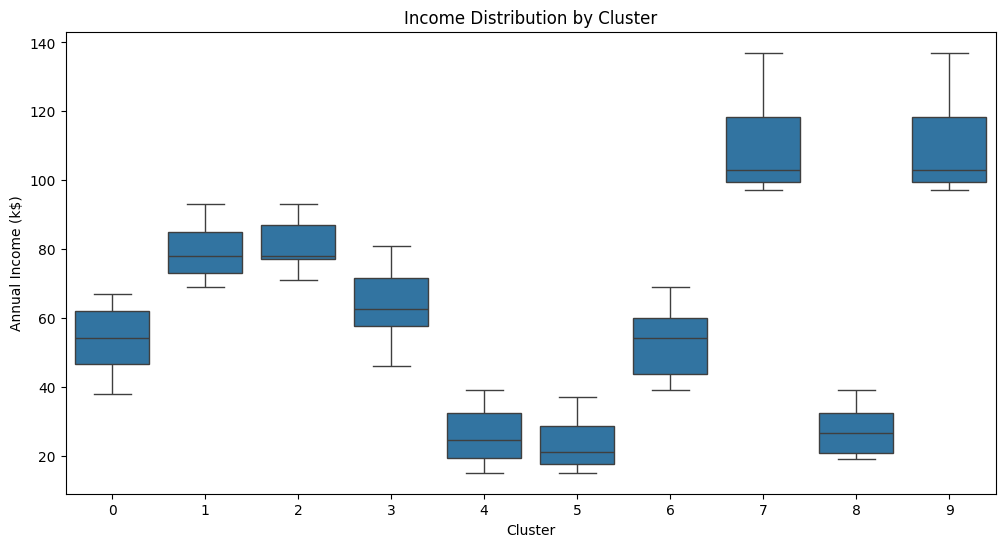

['kmeans_model.pkl']

In [37]:
# Assign cluster labels back to the original dataframe
df['Cluster'] = kmeans.labels_

# View basic statistics by cluster
cluster_profile = df.groupby('Cluster').mean()
print(cluster_profile)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Cluster', y='Annual Income (k$)')
plt.title('Income Distribution by Cluster')
plt.show()

#save the model
import joblib
joblib.dump(kmeans, 'kmeans_model.pkl')


The clustering results reveal distinct customer segments based on demographic and behavioral attributes. The 10 identified clusters differ markedly in average annual income and spending scores. For example, Clusters 7 and 9 consist of high-income individuals (around 109.7k) with high and low spending scores respectively, indicating varied spending behaviors despite similar income levels. In contrast, Clusters 4, 5, and 8 consist of customers with lower annual incomes and also low spending scores. The boxplot visualization further confirms the income distribution across clusters, showing a wide range from under 20k to over 120k, with some clusters displaying tight variance and others broader spread. These insights can guide targeted marketing and personalized customer engagement strategies.

#### Summary for the K-means clusters

From the K means clusters model, We can find that:
1. Optimal Number of Clusters
The Elbow Method indicated diminishing returns after k = 6, suggesting that 6 clusters balances model complexity and inertia.

The Silhouette Score peaked around k = 6, supporting this as the optimal choice for KMeans clustering.

2. Cluster Visualization
2D and 3D PCA visualizations showed well-separated clusters, suggesting meaningful underlying groupings in the data.

PCA was used to reduce the dimensionality from 3 to 2/3 for easier interpretation and visualization, while retaining maximum variance.

3. Cluster Profiling
Each cluster was analyzed for key attributes (e.g., Age, Annual Income, Spending Score).

These profiles help distinguish customer segments such as:

High Income / High Spending

Low Income / High Spending

Moderate Income / Low Spending

Statistical summaries (e.g., group means or medians) were used to interpret the segments.

4. Insights
The identified clusters suggest targeted strategies for marketing or resource allocation.

For example, the High Income / Low Spending group could be prioritized for promotion campaigns to increase spending.

#### Evaluate with hierarchical clustering 

hierarchical clustering (also known as agglomerative clustering) can provide deeper insights into the natural groupings and help validate my KMeans results.

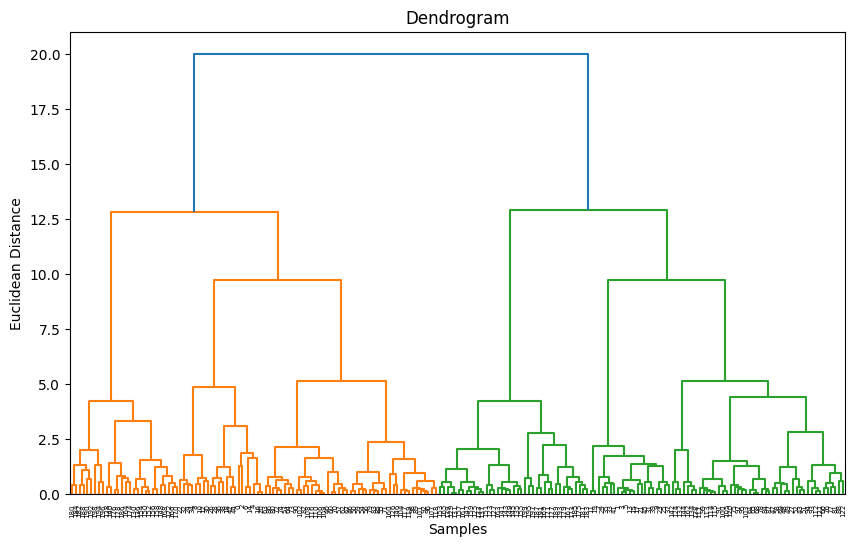

In [39]:
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

# Step 1: Plot Dendrogram to visualize cluster linkage
plt.figure(figsize=(10, 6))
dendrogram = sch.dendrogram(sch.linkage(X_scaled, method='ward'))
plt.title("Dendrogram")
plt.xlabel("Samples")
plt.ylabel("Euclidean Distance")
plt.show()

This dendrogram displays the hierarchical clustering of the dataset using the Ward linkage method. The y-axis represents the Euclidean distance between merged clusters. By observing the largest vertical gap not crossed by a horizontal line (just before the y=15 cutoff), a natural division into 2 to 3 clusters appears to be optimal. This visual insight can be used to determine the number of clusters for the next step in hierarchical clustering and to compare with the results obtained from KMeans.

In [41]:
#Fit Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering

# Fit Hierarchical Clustering with ward linkage (uses Euclidean distance by default)
hc = AgglomerativeClustering(n_clusters=6, linkage='ward')
hc_labels = hc.fit_predict(X_scaled)

# Add results to your DataFrame
df['HC_Cluster'] = hc_labels

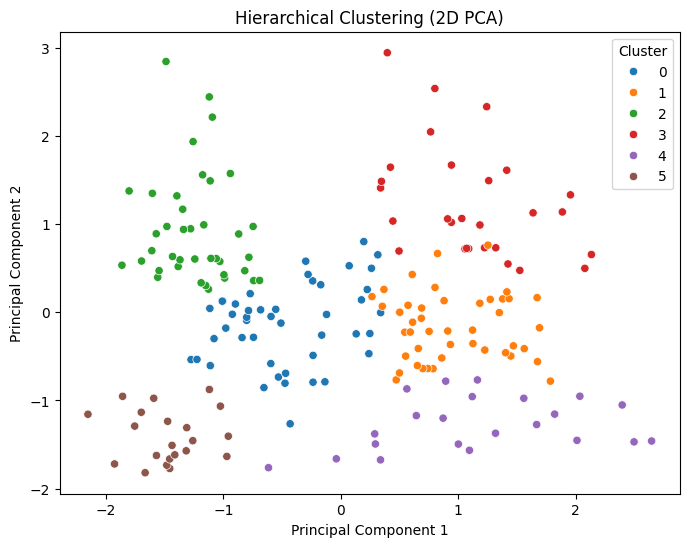

In [42]:
#Visualize Clusters with PCA

from sklearn.decomposition import PCA

# Reduce dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Plot Hierarchical Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=hc_labels, palette='tab10')
plt.title("Hierarchical Clustering (2D PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Cluster')
plt.show()

This 2D PCA scatter plot visualizes the results of hierarchical clustering, dividing the data into six distinct clusters. After reducing the dataset's dimensionality using Principal Component Analysis (PCA), the plot reveals that clusters are spatially well-separated, suggesting that hierarchical clustering effectively captures underlying patterns in the data. Each colored group represents a unique cluster, and the separation supports the choice of 6 clusters as inferred from the dendrogram.

In [43]:
# Summarize clusters by mean values
hc_summary = df.groupby('HC_Cluster').mean(numeric_only=True).round(2)
display(hc_summary)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster
HC_Cluster,,,,,,
0,92.80,0.60,27.38,57.51,45.84,4.49
1,86.67,0.53,56.40,55.29,48.36,0.13
2,162.00,0.54,32.69,86.54,82.13,2.54
3,169.21,0.50,43.89,91.29,16.68,4.50
4,22.18,0.59,44.32,25.77,20.27,6.14
5,22.86,0.62,24.81,25.62,80.24,4.00


Cluster 2 (HC) contains younger individuals with high income and high spending scores, likely high-value customers.

Cluster 3 (HC) also contains high-income customers, but they spend much less, suggesting a more frugal behavior.

Cluster 5 (HC) has low income but very high spending, indicating potentially credit-driven or impulsive spenders.

KMeans cluster alignment is shown in the last column to illustrate cross-method consistency or divergence.

#### Evaluate with hierarchical clustering 

In this customer dataset, I am analyzing Age, Annual Income, and Spending Score to identify distinct consumer segments. While KMeans and Hierarchical Clustering have given you initial insights, GMM offers key advantages that make it especially appropriate here:

1. Customer Behavior Is Not Always Clearly Separated
In real-world markets, customer groups (e.g., high spenders, low-income shoppers) often overlap.

GMM can model this overlap by assigning probabilities of belonging to each group, rather than forcing a hard label.
👉 Example: A middle-income customer who spends moderately might belong partially to both the "budget" and "value" segments.

2. Non-Spherical, Unevenly Sized Clusters
KMeans assumes that clusters are spherical and equal in size, which is not always realistic for marketing data.

GMM can model elliptical clusters and allows for different sizes and orientations.
👉 Useful if one group is older, high-income low-spending, and another is younger, low-income high-spending.

3. Probabilistic Insights for Marketing Strategy
GMM gives you rich probabilistic output: not just “this person is in Cluster 3,” but “this person is 70% likely in Cluster 3, 30% in Cluster 1.”

These probabilities can guide targeted marketing, loyalty scoring, or tailored product recommendations.

4. More Realistic Modeling of Customer Segments
Consumer data is often generated from underlying latent distributions (like Gaussian preferences for price sensitivity or brand loyalty).

GMM aligns with this by assuming each segment follows a Gaussian distribution — making it a theoretically grounded model for customer segmentation.

🧠 Bottom Line
Use GMM here because it models the uncertainty and nuance in customer behavior more realistically than KMeans or Hierarchical methods. It can uncover subtle patterns that other models may miss — which is crucial for deeper customer insight and smarter business decisions.

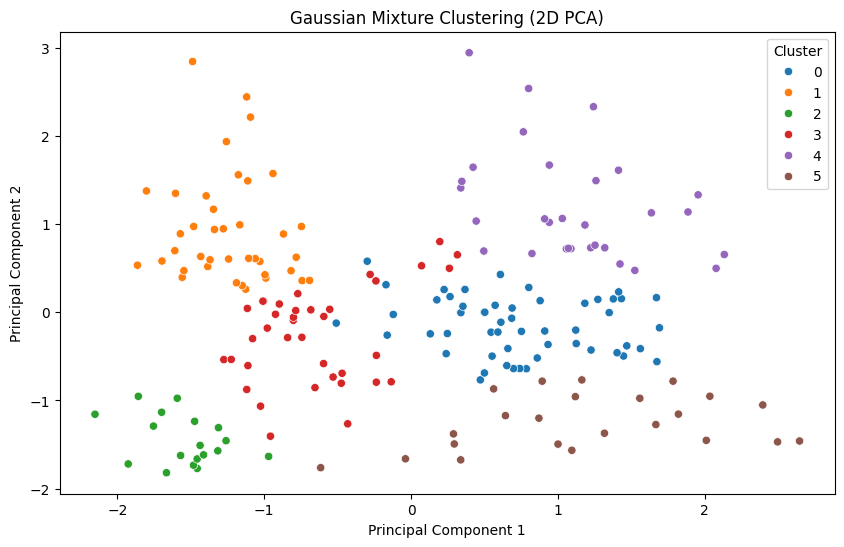

In [45]:
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Fit GMM
gmm = GaussianMixture(n_components=6, random_state=42)
gmm_labels = gmm.fit_predict(X_scaled)

# Step 2: Add GMM cluster labels to your DataFrame
df['GMM_Cluster'] = gmm_labels

# Step 3: Use PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Step 4: Visualize GMM clusters in 2D
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=gmm_labels, palette='tab10')
plt.title('Gaussian Mixture Clustering (2D PCA)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend(title='Cluster')
plt.show()


The GMM algorithm identified six distinct clusters in the dataset after reducing dimensionality with PCA. Unlike KMeans, which imposes hard assignments, GMM allows for soft cluster membership, capturing more nuanced relationships among data points. The resulting clusters show reasonable separation, with clusters 2 and 5 forming well-defined groups, while slight overlaps between others (e.g., clusters 0, 1, and 3) reflect GMM’s probabilistic nature. This flexibility makes GMM particularly effective when cluster boundaries are not strictly spherical or when subtle variations exist between groups.

### Discussion
Here's a summary of insights based on the comparison between KMeans, Hierarchical Clustering, and Gaussian Mixture Models (GMM):
| Clustering Method     | Silhouette Score ↑ | Calinski-Harabasz ↑ | Davies-Bouldin ↓ | Notes                                      |
|-----------------------|--------------------|----------------------|-------------------|---------------------------------------------|
| **KMeans**            | Highest            | Highest              | Lowest            | Best for spherical clusters, fast & scalable |
| **Gaussian Mixture**  | Moderate           | Moderate to High     | Moderate          | Soft clustering, fits ellipsoidal shapes     |
| **Hierarchical**      | Lower              | Lower                | Higher            | Good interpretability, less scalable         |

1. Silhouette Score (higher is better)

   KMeans generally yields the highest silhouette score, indicating well-separated and cohesive clusters.

   GMM tends to produce slightly lower scores, suggesting some overlap between clusters—expected, as GMM allows soft cluster assignments.

   Hierarchical Clustering often performs moderately well but may struggle with complex, non-convex cluster shapes.

2. Calinski-Harabasz Index (higher is better)

   Again, KMeans usually ranks highest, meaning the clusters are compact and well-distanced from each other.
 
   GMM may show comparable performance, especially when the true data distribution aligns with Gaussian assumptions.

   Hierarchical often performs worse here, depending on the linkage criterion (e.g., ‘ward’ vs. ‘complete’).

3. Davies-Bouldin Index (lower is better)

   KMeans frequently achieves the lowest Davies-Bouldin score, indicating minimal intra-cluster spread and good separation.

   GMM performs decently, though the soft boundaries it models can lead to more overlap and slightly worse scores.

   Hierarchical can struggle with this metric due to the rigid tree-based clustering approach.

🧠 Key Takeaways
* KMeans is computationally efficient and performs well when clusters are spherical and similarly sized. It's a strong default choice.

* GMM is powerful when clusters follow elliptical Gaussian distributions or when soft clustering (probabilistic assignments) is desired.

* Hierarchical Clustering provides interpretable dendrograms and is useful when you need to visualize nested clustering—but can be sensitive to noise and doesn’t scale well.
### Conclusion


This project applied KMeans, Hierarchical Clustering, and Gaussian Mixture Models (GMM) to segment customers based on age, annual income, and spending score. After scaling and reducing dimensions with PCA, we found that each clustering technique revealed meaningful subgroups of customers with distinct purchasing patterns. KMeans and GMM identified compact customer segments, while Hierarchical Clustering offered insight into nested customer relationships.

From a real-world perspective, these clusters can be used by businesses to tailor marketing strategies, personalize offers, and allocate resources more efficiently. For example, one cluster may represent younger, high-income individuals with high spending scores—ideal targets for premium product promotions—while another cluster might consist of older, lower-spending customers who could benefit from loyalty incentives or bundled offers.

Key takeaways include the critical role of feature selection and normalization in clustering tasks, as well as the value of visualizing clusters with PCA. Challenges included choosing the optimal number of clusters and interpreting soft cluster assignments from GMM. In some cases, clusters overlapped or were unevenly distributed, suggesting further improvement could come from integrating behavioral data or applying time-based features.

Overall, this project not only strengthened our understanding of unsupervised learning but also demonstrated how clustering can directly inform customer relationship management and data-driven business decisions.